# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data successfully loaded")

Data successfully loaded


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Uderstading the data 

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Plotting the data

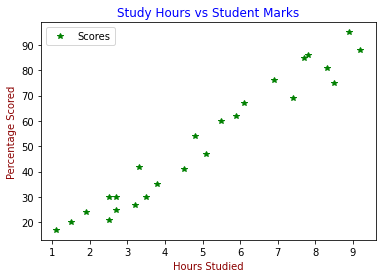

In [7]:
data.plot(x='Hours', y='Scores',style="*",color='green')
plt.xlabel("Hours Studied",color='darkred')
plt.ylabel("Percentage Scored",color='darkred')
plt.title("Study Hours vs Student Marks",color='blue') 
plt.show()

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# From the above plot, it is concluded that there is a linear relashionship between the hours and scores

# Cleaning the data

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
There are no null values in data, data cleaning is done successfully.

# Training and Testing the model

In [10]:
x = (data['Hours'].values).reshape(-1,1)
y = data['Scores'].values

In [11]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the data into Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state = 0)
print("Splitting is done")

Splitting is done


# Training the Simple Linear Regression Model on the Training Set

In [14]:
from sklearn.linear_model import LinearRegression
regn = LinearRegression()
regn.fit(x_train, y_train)
print('Training is done')

Training is done


In [15]:
print("Intercept value is:",regn.intercept_)
print("Linear Coefficient is:",regn.coef_)

Intercept value is: 2.0181600414346974
Linear Coefficient is: [9.91065648]


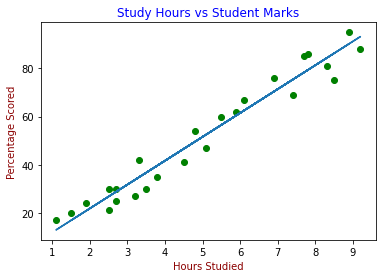

In [16]:
#Plotting the regression line
line = regn.coef_*x+regn.intercept_

#Plotting for test data
plt.scatter(x, y, color='green')
plt.xlabel("Hours Studied", color='darkred')
plt.ylabel("Percentage Scored",color='darkred')
plt.title("Study Hours vs Student Marks",color='blue')
plt.plot(x, line)
plt.show()

# Predicting values

In [17]:
y_pred = regn.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing the actual vs predicted values

In [21]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


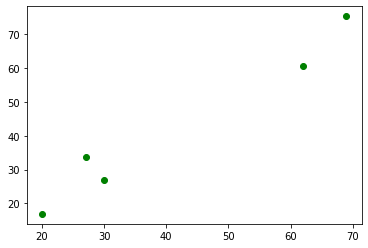

In [22]:
plt.scatter(y_test,y_pred,c='green')
plt.show()

# Solution for the given problem

# What will be predicted score if a student studies for 9.25hrs/day?

In [23]:
hours=9.25
pred_score=regn.predict([[hours]])
print("Number of hours= {}".format(hours))
print("Predicted score= {}".format(pred_score[0]))

Number of hours= 9.25
Predicted score= 93.69173248737535


# Evaluating the model

In [24]:
from sklearn import metrics 
print("Mean Absolute Error:", 
                             metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


# CONCLUSION

# For a student studying 9.25 hrs a day, the model predicts the score as 93.69